### Clustering Practise

This workbook is to practice and understand clustering algorithm and relevant python library

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df_customers = pd.read_csv('customer_example.csv')

0. First, do some quick data exploration

In [2]:
df_customers.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Distribution of two demensions

In [3]:
Satisfaction = df_customers.Satisfaction.value_counts()
Satisfaction

10    4
9     4
8     4
7     4
5     4
4     3
3     3
6     2
2     1
1     1
Name: Satisfaction, dtype: int64

(array([5., 4., 6., 7., 8.]),
 array([-1.69 , -1.076, -0.462,  0.152,  0.766,  1.38 ]),
 <a list of 5 Patch objects>)

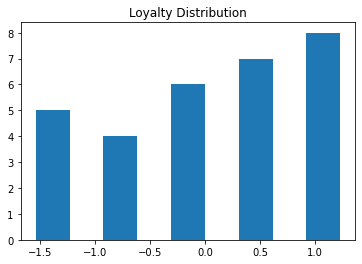

In [4]:
plt.title('Loyalty Distribution')
plt.hist(df_customers['Loyalty'], bins = 5, rwidth = 0.5)

#### 02. K-Mean Clustering

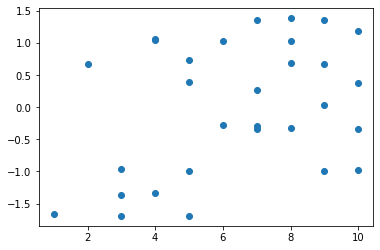

In [5]:
#Scatter Plot the raw data

plt.scatter(df_customers['Satisfaction'],df_customers['Loyalty'])


In [6]:
# got a k-means clusters

ss = StandardScaler()
df_customers = pd.DataFrame(ss.fit_transform(df_customers), columns=['Satisfaction', 'Loyalty'])

def kmeans(k):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(df_customers)
    y_kmeans = kmeans.fit_predict(df_customers)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return (y_kmeans, centers, labels)

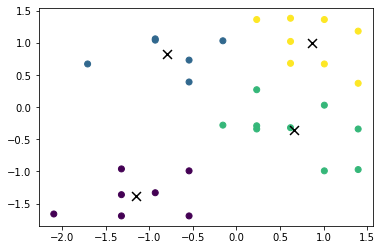

In [7]:
# when k = 3
y_kmeans, centers, labels = kmeans(4)

plt.scatter(df_customers['Satisfaction'],df_customers['Loyalty'], c = y_kmeans, cmap = 'viridis' )
plt.scatter(centers[:,0], centers[:, 1], c='black', s=80, marker='x')

Text(0.5, 1.0, 'Performance of K')

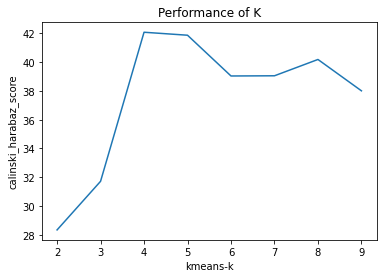

In [8]:
# Find the proper K for this dataset with Calinski-Harabasz Index
i = []
CH_score = []
max_k = len(df_customers.index)
for k in range(2,10):
    y_kmeans, centers, labels = kmeans(k)
    m = metrics.calinski_harabasz_score(df_customers, labels)
    i.append(k)
    CH_score.append(m)

plt.figure()  
plt.plot(i,CH_score)  
plt.xlabel("kmeans-k")  
plt.ylabel("calinski_harabaz_score")  
plt.title("Performance of K")  


Text(0.5, 1.0, 'Performance of K')

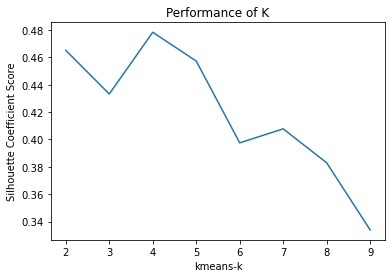

In [9]:
# Find the proper K for this dataset with Silhouette Coefficient

i = []
SC_score = []
max_k = len(df_customers.index)
for k in range(2,10):
    y_kmeans, centers, labels = kmeans(k)
    m = metrics.silhouette_score(df_customers, labels, metric = 'euclidean')
    i.append(k)
    SC_score.append(m)

plt.figure()  
plt.plot(i,SC_score)  
plt.xlabel("kmeans-k")  
plt.ylabel("Silhouette Coefficient Score")  
plt.title("Performance of K") 

#### 03. Hierarchy Clustering

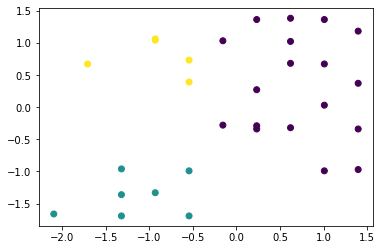

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

hc = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'complete')
labels = hc.fit_predict(df_customers)

plt.scatter(df_customers['Satisfaction'],df_customers['Loyalty'], c = labels, cmap = 'viridis' )

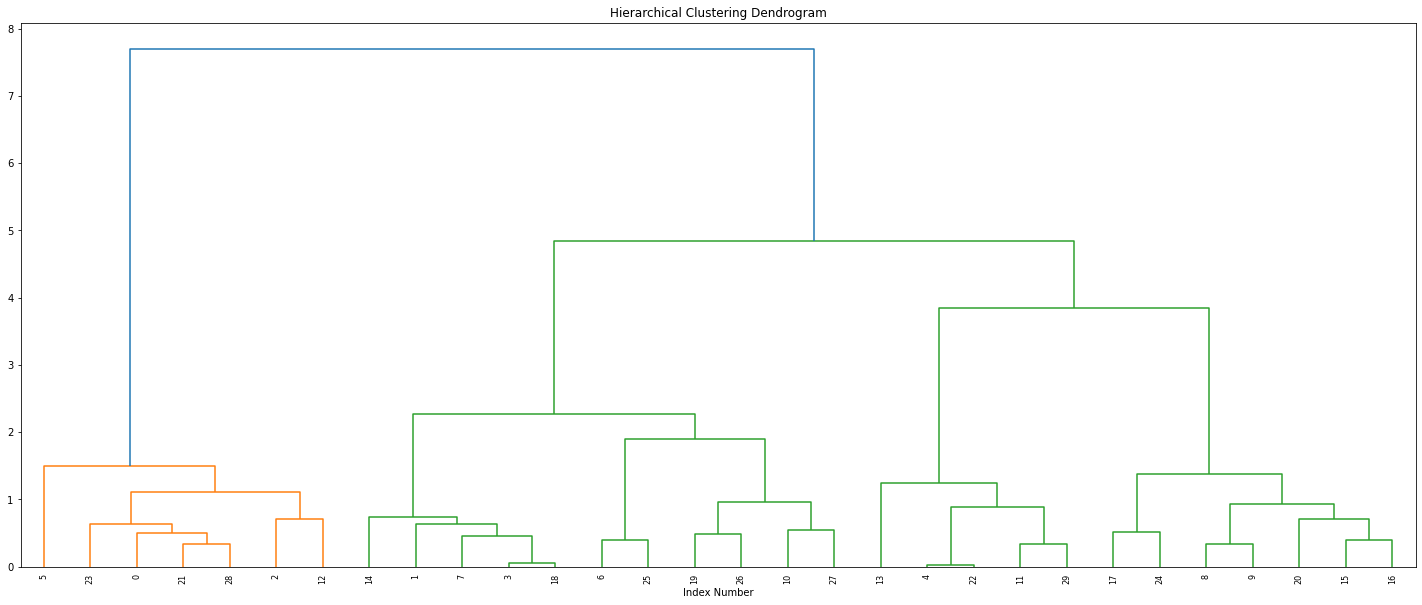

In [11]:
# Draw the dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

hc = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)
model = hc.fit(df_customers)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(
    model,     
    leaf_rotation = 90., 
    leaf_font_size = 8.,)
plt.xlabel("Index Number")
plt.show()
